In [ ]:
## preprocessing data

In [2]:
from openslide import open_slide
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [23]:
data = pd.read_csv("TCGA87.csv")

In [ ]:
def showdata(data):
    
    plt.figure(figsize=(8,6))
    ax = data['label'].value_counts().plot(kind='bar', color=['skyblue','salmon'], edgecolor='black', linewidth=1.2)
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x()*1.005, p.get_height()*1.005),fontsize=12)
    plt.title('Epithelioid vs. Biphasic')
    plt.xlabel('Mesothelioma')
    plt.xticks(ticks=[0,1], labels=['Epithelioid','Biphasic'], rotation = 0)
    plt.show()

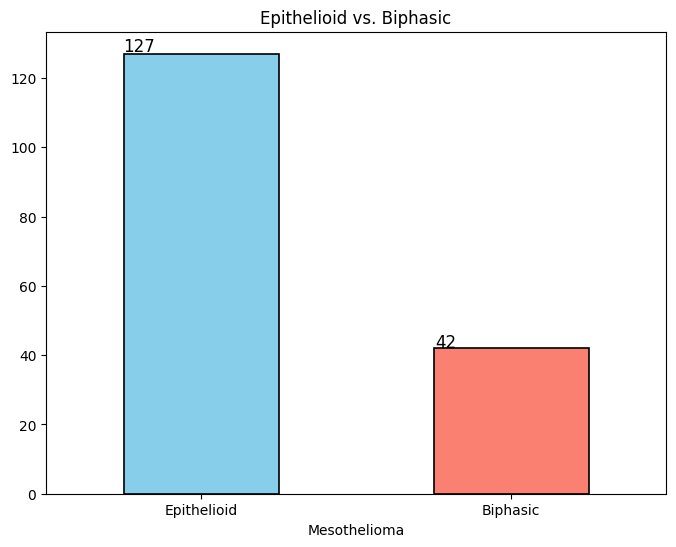

In [24]:
showdata(data)

Total TCGA patient is 87. For binary classification, we chose 80 patients out of 87 for Epithelioid and Biphasic.  

Some patients have more than 1 whole slide images. Thus, total of whole slide images are **149**


#### since our data is small,  random select will run the risk of introducing a significant sampling bias

#### using stratified sampling--> distribution divided into homogeneous sub-groups- 

#### 70% training,  10% validation, 20% testing

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

In [25]:
test = pd.read_csv("test_0.csv")

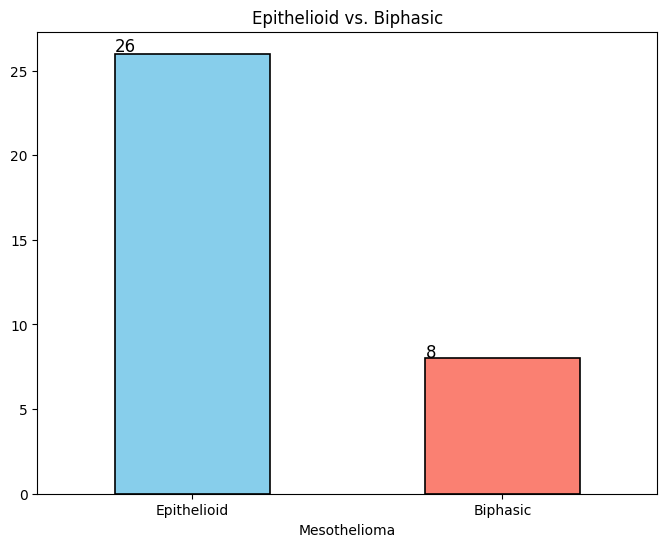

In [26]:
showdata(data=test) ## using stratified sampling, keep trainset, testset in same distribution. 

### Use OpenSlide package to load Whole slide images. 
Since there are a lot of blank space. 
A region of interest (ROI) is a portion of an image that you want to filter or operate on in some way.
using ROI to get forground part which is tissues. 
After found the boundary for images. tiling into 256x256 images. 
A Whole slide image could tile into 1000 to up 20000 images and even more.

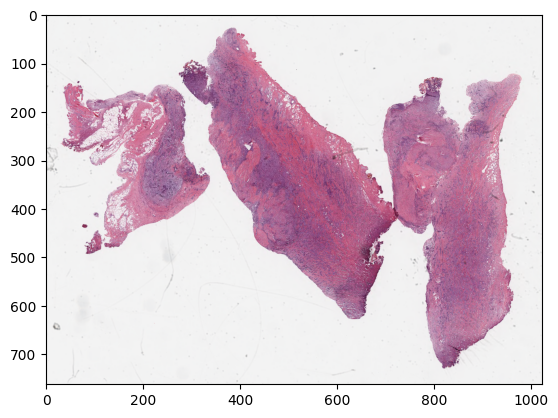

In [12]:
image_path = 'example.png'
image = Image.open(image_path)
plt.imshow(image)

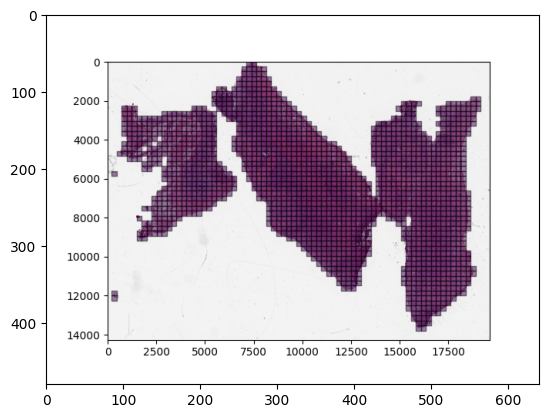

In [13]:
image_path1 = 'example1.png'
image1 = Image.open(image_path1)
plt.imshow(image1)

In [14]:
paths=['sample_preprocessing/1.png','sample_preprocessing/2.png','sample_preprocessing/3.png']
images = [Image.open(path) for path in paths]

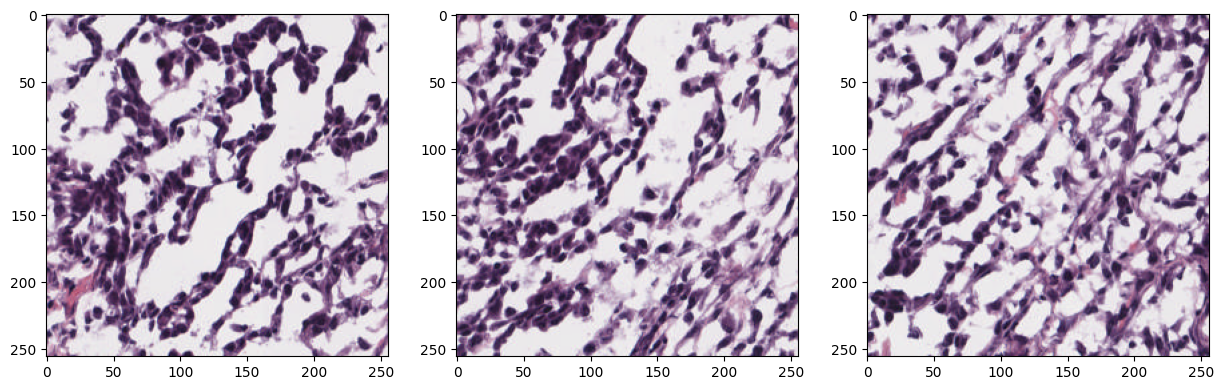

In [19]:
fig, axes = plt.subplots(1,3,figsize=(15,5))
for ax, img in zip(axes,images):
    ax.imshow(img)
    # ax.axis('off')
plt.show()

### Prov-gigapth model to add classification head for binary image classifcation. 

`classifier = nn.Sequential(*[nn.Linear(self.feat_dim, n_classes)])`  

`The layers from which embeddings are fed to the classifier, e.g., 5-11 for taking out the 5th and 11th layers')`  

`loss_fn = torch.nn.CrossEntropyLoss()`



In [28]:

result = pd.read_csv("summary.csv")

In [37]:
result

,val_loss,val_bacc,val_acc,val_macro_auroc,val_macro_auprc,val_0_auroc,val_1_auroc,val_0_auprc,val_1_auprc,test_loss,test_bacc,test_acc,test_macro_auroc,test_macro_auprc,test_0_auroc,test_1_auroc,test_0_auprc,test_1_auprc
0,0.532751,0.500000,0.764706,0.653846,0.661872,0.653846,0.653846,0.880561,0.443182,0.523211,0.500000,0.764706,0.742788,0.795466,0.742788,0.742788,0.876908,0.714025
1,0.605476,0.461538,0.705882,0.461538,0.543962,0.461538,0.461538,0.776686,0.311237,0.517959,0.524038,0.735294,0.658654,0.645860,0.658654,0.658654,0.841306,0.450415
2,0.600439,0.500000,0.764706,0.538462,0.570816,0.538462,0.538462,0.764627,0.377005,0.495911,0.500000,0.764706,0.793269,0.730787,0.793269,0.793269,0.939324,0.522250
3,0.625730,0.673077,0.764706,0.692308,0.761972,0.692308,0.692308,0.863526,0.660417,0.523210,0.687500,0.852941,0.763221,0.771820,0.762019,0.764423,0.911919,0.631721
4,0.506060,0.500000,0.764706,0.923077,0.875247,0.923077,0.923077,0.979660,0.770833,0.534995,0.500000,0.764706,0.687500,0.686569,0.687500,0.687500,0.862682,0.510456
5,0.540592,0.500000,0.764706,0.596154,0.669249,0.596154,0.596154,0.867664,0.470833,0.529331,0.500000,0.764706,0.712740,0.702900,0.713942,0.711538,0.898241,0.507559
6,0.611666,0.500000,0.764706,0.326923,0.484513,0.326923,0.326923,0.758690,0.210335,0.439701,0.562500,0.794118,0.894231,0.842286,0.894231,0.894231,0.970057,0.714516
7,0.389343,0.750000,0.882353,0.846154,0.844173,0.846154,0.846154,0.952235,0.736111,0.546640,0.625000,0.823529,0.586538,0.669208,0.586538,0.586538,0.832341,0.506074
8,0.567254,0.500000,0.764706,0.557692,0.650081,0.557692,0.557692,0.832899,0.467262,0.566889,0.562500,0.794118,0.543269,0.620703,0.543269,0.543269,0.798606,0.442800
9,0.407916,0.500000,0.764706,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.539238,0.500000,0.764706,0.639423,0.625397,0.639423,0.639423,0.820575,0.430220


In [36]:
result['test_acc']   
## from the result. it seems like fold 3, 7 have better performance.  
## Since our data distribution is around 75%, 

0    0.764706
1    0.735294
2    0.764706
3    0.852941
4    0.764706
5    0.764706
6    0.794118
7    0.823529
8    0.794118
9    0.764706
Name: test_acc, dtype: float64